In [19]:
import numpy as np
from numpy import pi

# importing Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [20]:
# WITHOUT RECURSION
# rotate second most significant, followed by third and so on

def qft_rotations(circuit,n):
    """use while loop instead of recursion"""
    if n == 0:
        return circuit
    while n > 0: 
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cu1(pi/2**(n-qubit), qubit, n)  

In [24]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on first n qubits in circuit"""
    qft_rotations(circuit, n)
    circuit.barrier() # for aesthetics
    swap_registers(circuit, n)
    return circuit

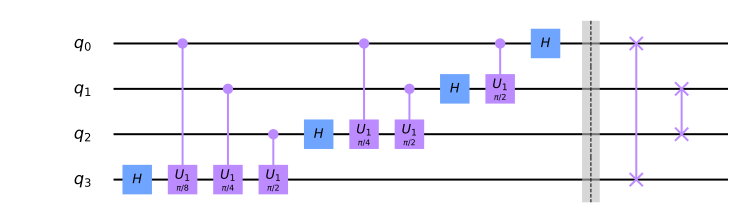

In [25]:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw('mpl')

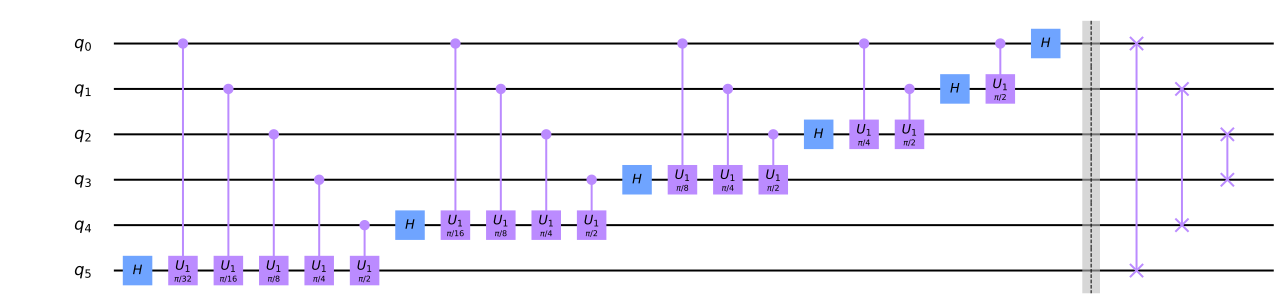

In [26]:
qc = QuantumCircuit(6)
qft(qc,6)
qc.draw('mpl')